In [31]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import cm
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [32]:
def c(a, n):
    """This function calculates the c_n coefficients in the sum"""
    return (a**(2*n))/(np.math.factorial(n)*np.sqrt(n+1))

In [33]:
def f(t, lamb, n):
    """This function calculates the time dependent functions in the sum"""
    return np.sin(lamb*np.sqrt(n+1)*t)*np.cos(lamb*np.sqrt(n+2)*t)*np.sin(t)

In [34]:
a = 4
t = np.linspace(0, 250, 9.9e3)

## 'Test' of non-divergence for the coefficients
### There seems to be a problem with the memory of the kernel (Jupyter) so I had to split the sum in three cases. Max $n=100$ (off-scale)

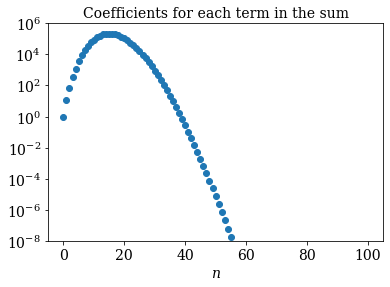

In [35]:
for n in range(0,16):
    plt.scatter(n, c(a,n), c='C0')
for n in range(17,100):
    plt.scatter(n, c(a,n), c='C0')
plt.scatter(16, c(a,16))

plt.ylim([1e-8, 1e6])
plt.yscale('log')
plt.title('Coefficients for each term in the sum', fontsize=14)
plt.xlabel('$n$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## The expectation value
### I ran into the same issue so I also split the sum into three parts

In [36]:
psi = {}
lamb = [1/20, 1/2]

for l in lamb:
    psi[l] = 0
    for n in range(0,16):
        psi[l] = psi[l]+ c(a,n)*f(t,l, n)
    for n in range(17,100):
        psi[l] = psi[l]+ c(a,n)*f(t,l, n)
    psi[l] = psi[l]+ c(a,16)*f(t,l, 16)
    
    psi[l] = 2*a*np.exp(-a**2)*psi[l]

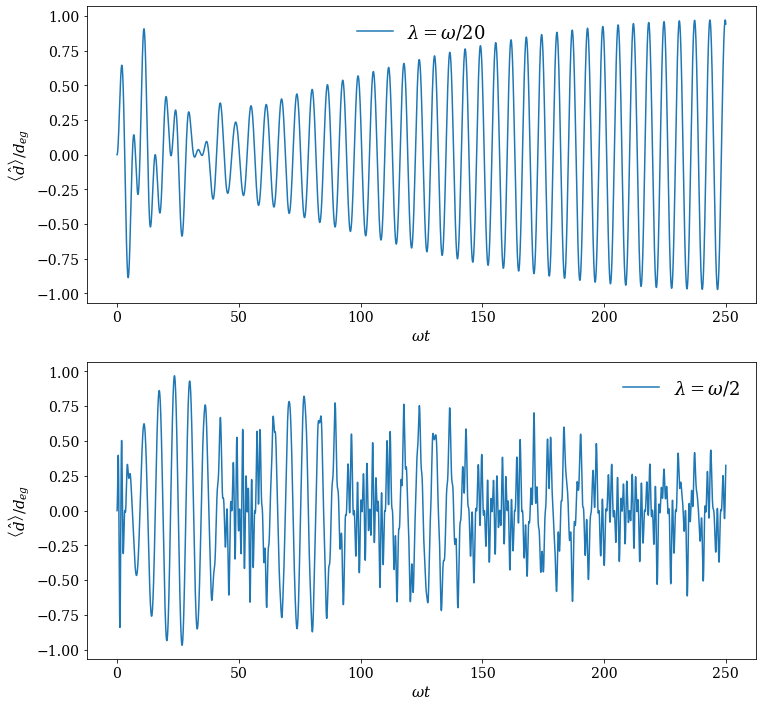

In [40]:
title_labels = ['20', '2']
plt.figure(figsize=(12,12))
i = 1
for l,s in zip(lamb, title_labels):
    plt.subplot(2,1,i)
    plt.plot(t, psi[l], label = '$\lambda = \omega/%s$'%s)
    plt.xlabel('$\omega t$', fontsize=15)
    plt.ylabel(r'$\left<\hat{d} \right>/d_{eg} $', fontsize=15, rotation=90)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='best', frameon=0, fontsize=18)
    i = i+1

plt.savefig('dipole.pdf',bbox_inches='tight')
plt.show()